In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test)= datasets.cifar10.load_data()

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_train = y_train.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X,y,index):
    plt.figure(figsize = (10,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


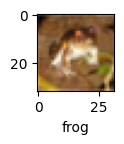

In [13]:
plot_sample(X_train, y_train,0)

In [14]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_train_categorical[:5]

In [17]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10 , activation="sigmoid")
])


ann.compile(optimizer="SGD",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])
ann.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.3061 - loss: 1.9280
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.4153 - loss: 1.6455
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4503 - loss: 1.5554
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.4783 - loss: 1.4813
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.4978 - loss: 1.4312


In [19]:
cnn = models.Sequential([

    layers.Conv2D(filters=32, kernel_size=(3,3),activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10 , activation="softmax")
])

cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])
cnn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.4115 - loss: 1.6092
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6385 - loss: 1.0318
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7128 - loss: 0.8297
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7755 - loss: 0.6484
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8355 - loss: 0.4773
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8857 - loss: 0.3372
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9281 - loss: 0.2192
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.9536 - loss: 0.1415
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.9659 - loss: 0.1082
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.9717 - loss: 0.0883


In [20]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5860 - loss: 535.7776


[543.5490112304688, 0.5802000164985657]

In [21]:
y_test = y_test.reshape(-1,)


In [23]:
y_predict=cnn.predict(X_test)
y_calsses=[np.argmax(i) for i in y_predict]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


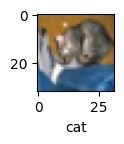

In [26]:
plot_sample(X_test,y_test,0)

In [27]:
classes[y_calsses[0]]

'cat'

In [29]:
from sklearn.metrics import confusion_matrix , classification_report

In [31]:
print(classification_report(y_test,y_calsses))

              precision    recall  f1-score   support

           0       0.54      0.78      0.63      1000
           1       0.57      0.87      0.69      1000
           2       0.56      0.49      0.52      1000
           3       0.46      0.25      0.32      1000
           4       0.79      0.19      0.31      1000
           5       0.43      0.68      0.53      1000
           6       0.86      0.45      0.59      1000
           7       0.72      0.65      0.68      1000
           8       0.72      0.69      0.70      1000
           9       0.54      0.76      0.63      1000

    accuracy                           0.58     10000
   macro avg       0.62      0.58      0.56     10000
weighted avg       0.62      0.58      0.56     10000

